# Clusterização

#### 1 - Carga de dados após EAD

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib import cm
from sklearn.decomposition import PCA
%matplotlib inline

df = pd.read_pickle("../../Data/Processed/df_2009.pkl") 

df.head()

,Pot_ativa,Pot_reativa,Tensao,Corrente,Ene_cozinha,Ene_lavanderia,Ene_porao,Mes,Ano,Inverno,Primavera,Verao,Outono
746,1406.692,112.668,242.655,2.4,765.0,3845.0,2803.0,1,2009,1,0,0,0
747,1807.460,149.582,244.520,4.0,3330.0,622.0,7494.0,1,2009,1,0,0,0
748,2467.626,189.112,242.750,5.0,11178.0,2740.0,8834.0,1,2009,1,0,0,0
749,1641.140,143.048,243.325,2.6,2807.0,2364.0,7309.0,1,2009,1,0,0,0
750,1512.802,190.462,241.240,3.8,1067.0,1052.0,11709.0,1,2009,1,0,0,0


#### 2 - Normalizando os dados

> Dadas as variações de escala das informações é necessário normalizar o datatset

In [37]:
# Referência = https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scaler = StandardScaler()

data_scaled = scaler.fit_transform(df)

df_s = pd.DataFrame(data_scaled, columns=df.columns)

df_s

,Pot_ativa,Pot_reativa,Tensao,Corrente,Ene_cozinha,Ene_lavanderia,Ene_porao,Mes,Ano,Inverno,Primavera,Verao,Outono
0,-0.263405,-1.347519,0.352130,-0.635059,-0.523157,1.197400,-2.093305,-1.601018,0.0,1.744834,-0.58158,-0.57735,-0.57735
1,0.500834,-0.688982,1.445442,0.250193,1.031443,-0.542376,-0.684145,-1.601018,0.0,1.744834,-0.58158,-0.57735,-0.57735
2,1.759729,0.016224,0.407822,0.803476,5.787974,0.600921,-0.281613,-1.601018,0.0,1.744834,-0.58158,-0.57735,-0.57735
3,0.183672,-0.805547,0.744902,-0.524403,0.714462,0.397956,-0.739718,-1.601018,0.0,1.744834,-0.58158,-0.57735,-0.57735
4,-0.061060,0.040308,-0.477380,0.139537,-0.340120,-0.310262,0.582026,-1.601018,0.0,1.744834,-0.58158,-0.57735,-0.57735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1.240711,0.338268,0.783007,1.356759,1.569644,-0.706475,0.804620,1.585103,0.0,1.744834,-0.58158,-0.57735,-0.57735
360,1.047435,-0.116575,1.404406,1.135446,0.331419,0.235476,1.550805,1.585103,0.0,1.744834,-0.58158,-0.57735,-0.57735
361,0.959468,0.960627,0.847491,1.246103,-0.223146,-0.691361,0.130230,1.585103,0.0,1.744834,-0.58158,-0.57735,-0.57735
362,1.728234,1.402054,-0.585832,1.467416,2.215727,1.572021,0.814834,1.585103,0.0,1.744834,-0.58158,-0.57735,-0.57735


> Utilizando o KMeans

In [38]:
df_s.dtypes

Pot_ativa         float64
Pot_reativa       float64
Tensao            float64
Corrente          float64
Ene_cozinha       float64
Ene_lavanderia    float64
Ene_porao         float64
Mes               float64
Ano               float64
Inverno           float64
Primavera         float64
Verao             float64
Outono            float64
dtype: object

> Técnica do Elbow para determinar o melhor k

In [39]:
centroids = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_s)
    centroids.append(kmeans.inertia_)

In [40]:
centroids

[4368.0,
 3534.2819038144476,
 3019.0441658549535,
 2506.1514648833254,
 2169.8876867082554,
 1978.5047620018054,
 1838.9929236239886,
 1707.8837299326817,
 1598.3040752070535,
 1489.0809595223864]

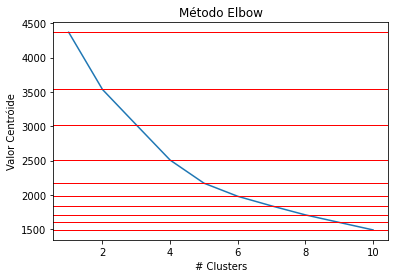

In [41]:
plt.plot(range(1,11), centroids)
plt.title('Método Elbow')
plt.xlabel('# Clusters')
plt.ylabel('Valor Centróide')
for val in centroids:
    plt.axhline(val, color='red', linewidth=1)
plt.show()

> Pelo método Elbow podemos tentar utilizar o k entre 6 e 7. Escolhemos 6 por depois deste a razão de valores diminui pouco.

In [42]:
# Incluindo a clusterização no dataframe original
kmeans = KMeans(n_clusters=6)
num_cluster = kmeans.fit_predict(df_s)
df['Cluster'] = num_cluster

In [43]:
df

,Pot_ativa,Pot_reativa,Tensao,Corrente,Ene_cozinha,Ene_lavanderia,Ene_porao,Mes,Ano,Inverno,Primavera,Verao,Outono,Cluster
746,1406.692,112.668,242.655,2.4,765.0,3845.0,2803.0,1,2009,1,0,0,0,5
747,1807.460,149.582,244.520,4.0,3330.0,622.0,7494.0,1,2009,1,0,0,0,5
748,2467.626,189.112,242.750,5.0,11178.0,2740.0,8834.0,1,2009,1,0,0,0,3
749,1641.140,143.048,243.325,2.6,2807.0,2364.0,7309.0,1,2009,1,0,0,0,5
750,1512.802,190.462,241.240,3.8,1067.0,1052.0,11709.0,1,2009,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,2195.452,207.164,243.390,6.0,4218.0,318.0,12450.0,12,2009,1,0,0,0,1
1106,2094.098,181.668,244.450,5.6,2175.0,2063.0,14934.0,12,2009,1,0,0,0,1
1107,2047.968,242.050,243.500,5.8,1260.0,346.0,10205.0,12,2009,1,0,0,0,1
1108,2451.110,266.794,241.055,6.2,5284.0,4539.0,12484.0,12,2009,1,0,0,0,3


> **Potência ativa x Energia Cozinha** {'Cozinha':['Lava Louças', 'Forno Elétrico', 'Microondas']}

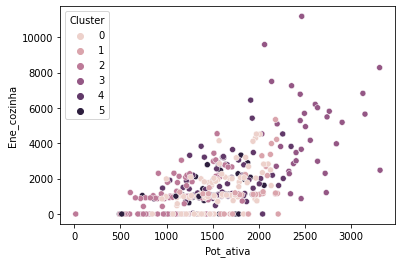

In [44]:
sns.scatterplot(x='Pot_ativa', y='Ene_cozinha', data=df, hue='Cluster')
plt.show()

> **Potência ativa x Energia Lavanderia** {'Lavanderia':['Máquina de lavar roupa', 'Máquina de secar roupa', 'Refrigerador', 'Lâmpada']}

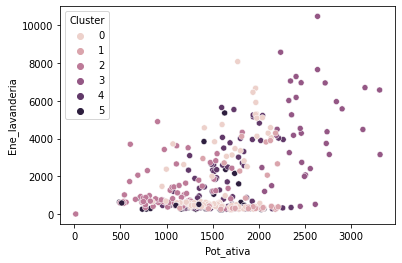

In [45]:
sns.scatterplot(x='Pot_ativa', y='Ene_lavanderia', data=df, hue='Cluster')
plt.show()

> **Potência ativa x Energia Porão** {'Porão?':['Boiler', 'Ar Condicionado']}

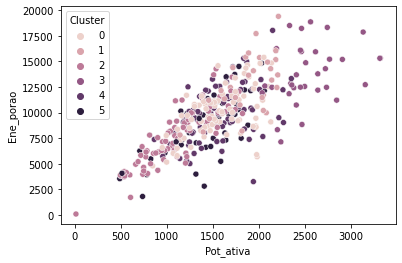

In [46]:
sns.scatterplot(x='Pot_ativa', y='Ene_porao', data=df, hue='Cluster')
plt.show()

> **Potência Ativa consumida no verão, inverno, primavera e outono**

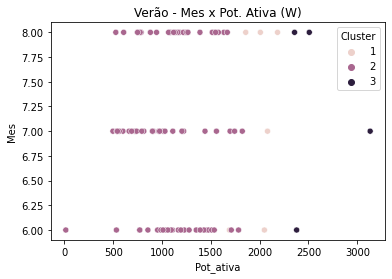

In [47]:
# Verão
sns.scatterplot(x='Pot_ativa', y='Mes', data=df[df['Verao']==1], hue='Cluster')
plt.title('Verão - Mes x Pot. Ativa (W)')
plt.show()

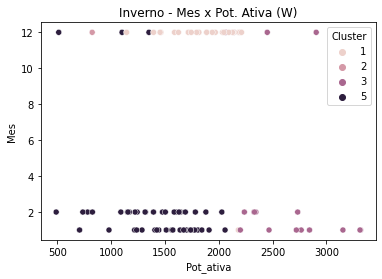

In [48]:
# Inverno
sns.scatterplot(x='Pot_ativa', y='Mes', data=df[df['Inverno']==1], hue='Cluster')
plt.title('Inverno - Mes x Pot. Ativa (W)')
plt.show()

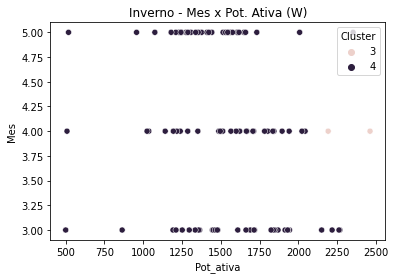

In [49]:
# Primavera
sns.scatterplot(x='Pot_ativa', y='Mes', data=df[df['Primavera']==1], hue='Cluster')
plt.title('Inverno - Mes x Pot. Ativa (W)')
plt.show()

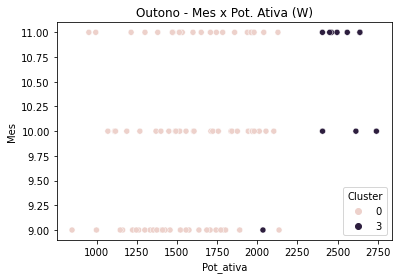

In [50]:
# Outono
sns.scatterplot(x='Pot_ativa', y='Mes', data=df[df['Outono']==1], hue='Cluster')
plt.title('Outono - Mes x Pot. Ativa (W)')
plt.show()

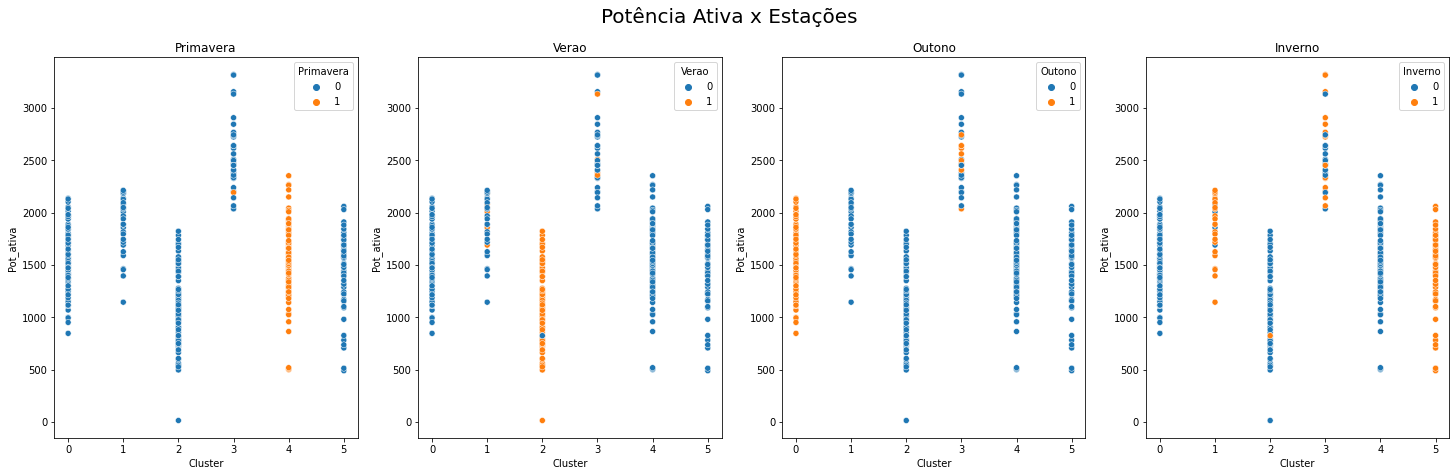

In [51]:
fig, axs = plt.subplots(1, 4, figsize=(25,7))
fig.suptitle('Potência Ativa x Estações', size=20)
axs = axs.flatten()
for i, col in enumerate(['Primavera','Verao','Outono','Inverno']):
    sns.scatterplot(x='Cluster', y='Pot_ativa', data=df, ax=axs[i], hue=col)
    axs[i].set_title(col)

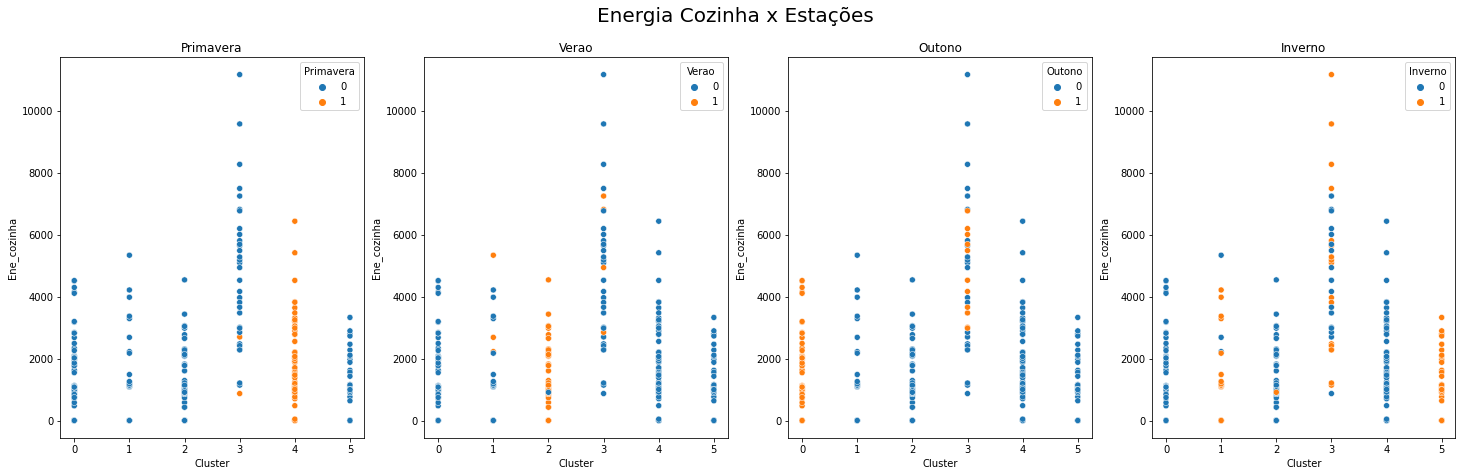

In [52]:
fig, axs = plt.subplots(1, 4, figsize=(25,7))
fig.suptitle('Energia Cozinha x Estações', size=20)
axs = axs.flatten()
for i, col in enumerate(['Primavera','Verao','Outono','Inverno']):
    sns.scatterplot(x='Cluster', y='Ene_cozinha', data=df, ax=axs[i], hue=col)
    axs[i].set_title(col)

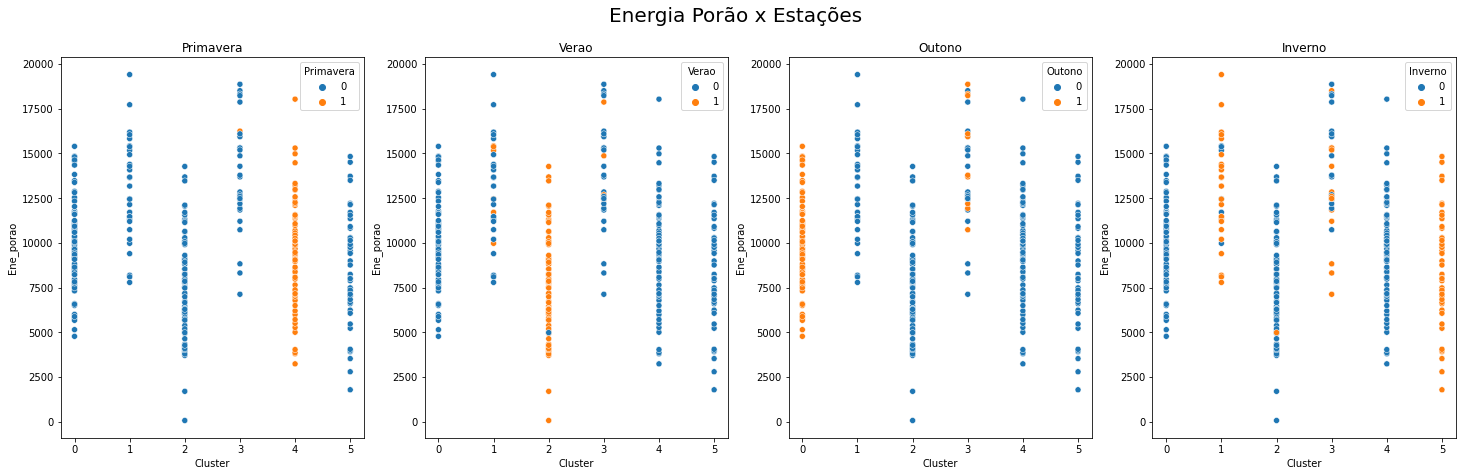

In [53]:
fig, axs = plt.subplots(1, 4, figsize=(25,7))
fig.suptitle('Energia Porão x Estações', size=20)
axs = axs.flatten()
for i, col in enumerate(['Primavera','Verao','Outono','Inverno']):
    sns.scatterplot(x='Cluster', y='Ene_porao', data=df, ax=axs[i], hue=col)
    axs[i].set_title(col)

> Visualização de boxplot por cluster

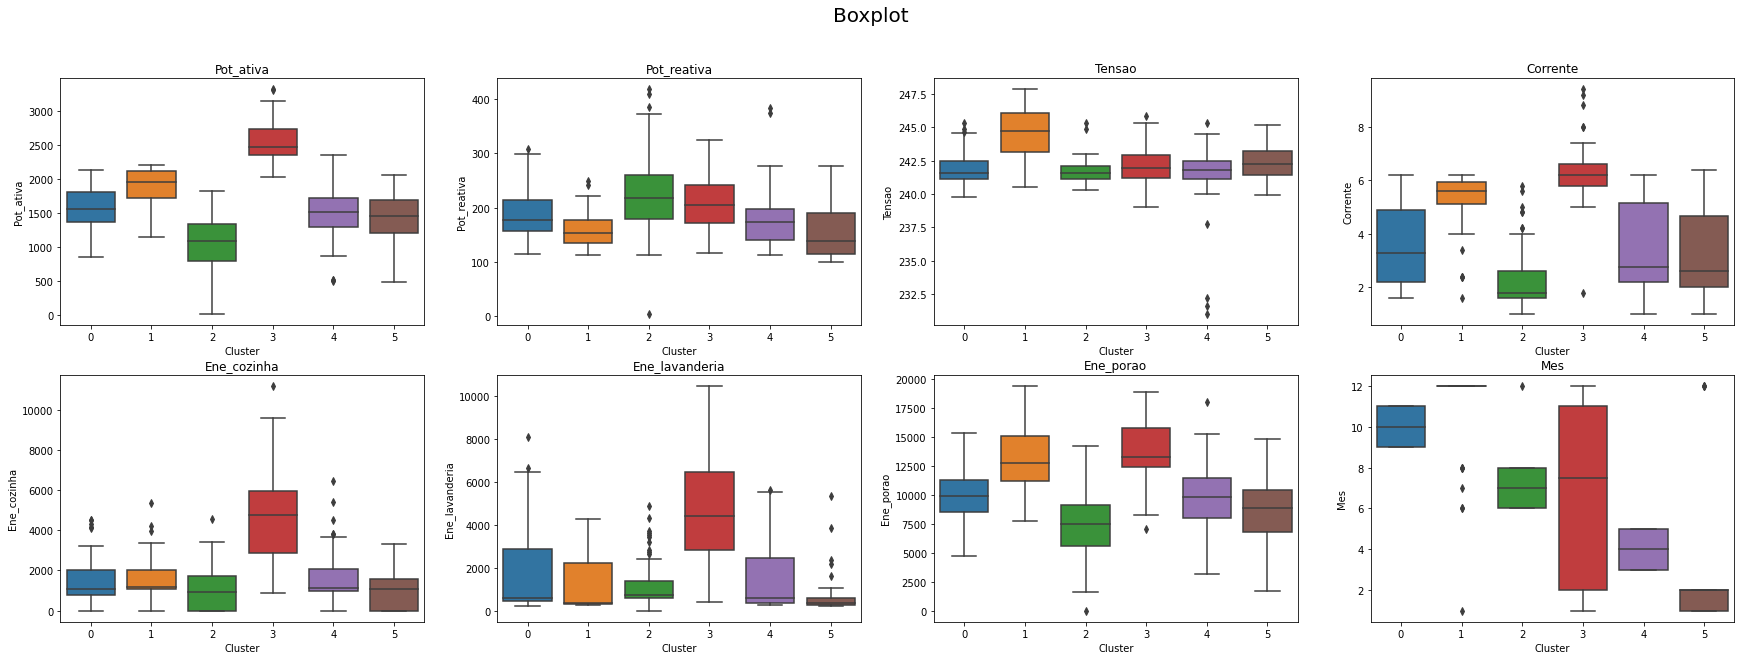

In [54]:
fig, axs = plt.subplots(2, 4, figsize=(30,10))
fig.suptitle('Boxplot', size=20)
axs = axs.flatten()
for i, col in enumerate(df.iloc[:,0:8].columns):
    sns.boxplot(x='Cluster', y=col, data=df, orient='v', ax=axs[i])
    axs[i].set_title(col)

> Método da Silhueta para determinar a escolha de k e a qualidade dos clusters

In [55]:
silhouette_scores = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(df_s)
    silhouette_scores.append(silhouette_score(df_s, cluster_labels))

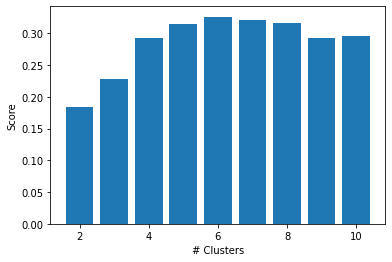

In [56]:
plt.bar(range(2,11), silhouette_scores)
plt.xlabel('# Clusters')
plt.ylabel('Score')
plt.show()

> Podemos observar que a escolha de 6 clusters parece ser a mais adequada. Vamos validar a qualidade destes clusters com o gráfico de silhueta.

> Gráfico Silhueta x Scatter Plot

In [57]:
def grafico_silhueta(valores_x: int, valores_y: int, tit_x: str, tit_y: str) -> None:
  for n_clusters in range(2,11):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(df_s)
    silhouette_values = silhouette_samples(df_s, cluster_labels)

    y_lower = 0
    fig, axes = plt.subplots(1,2, figsize=(20,5))
    for i in range(n_clusters):
      i_cluster_silhouette = silhouette_values[cluster_labels==i]
      i_cluster_silhouette.sort()
      size_cluster_i = i_cluster_silhouette.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i)/n_clusters)

      axes[0].fill_betweenx(np.arange(y_lower, y_upper),0, i_cluster_silhouette, facecolor=color, edgecolor=color)

      y_lower = y_upper
      axes[0].set_title('Metodo da Silhueta')
      axes[0].set_xlabel('Coeficientes')
      axes[0].set_ylabel('Cluster Label')

      silhouette_avg = silhouette_score(df_s, cluster_labels)
      axes[0].axvline(x=silhouette_avg, color='red', linestyle='--')
      axes[0].set_yticks([])
      axes[0].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      color = cm.nipy_spectral(cluster_labels.astype(float)/n_clusters)
      axes[1].scatter(valores_x, valores_y, c=color)

      axes[1].set_title('Scatter Plot')
      axes[1].set_xlabel(tit_x)
      axes[1].set_ylabel(tit_y)

      plt.suptitle(f'Silhueta K = {n_clusters}')

    plt.show()

> Gráfico Silhueta Pot. Ativa x Pot. Reativa

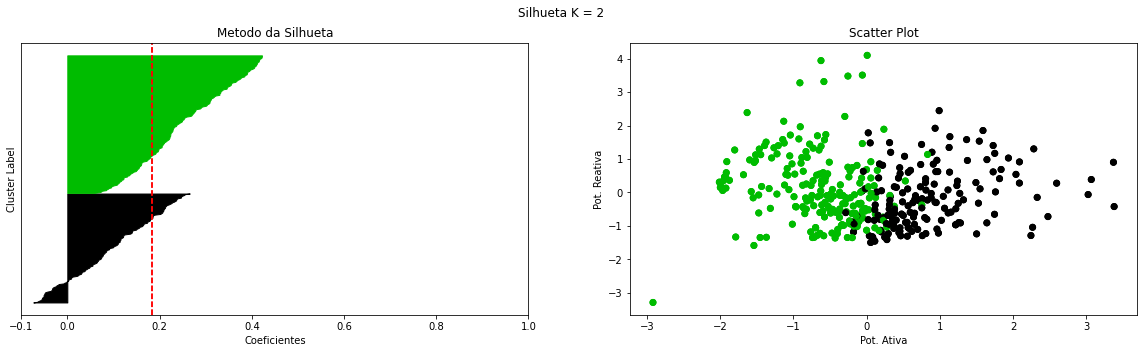

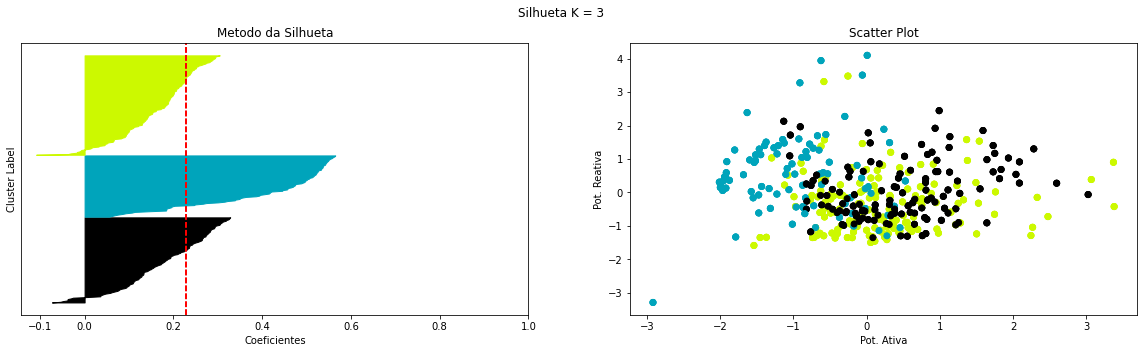

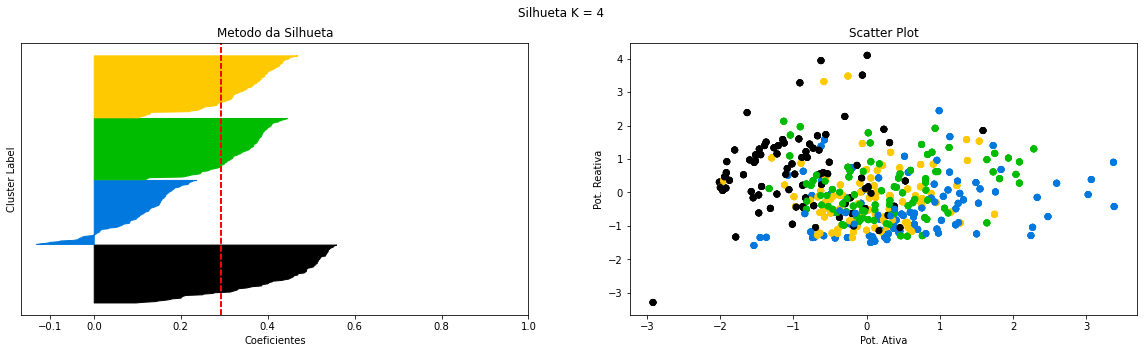

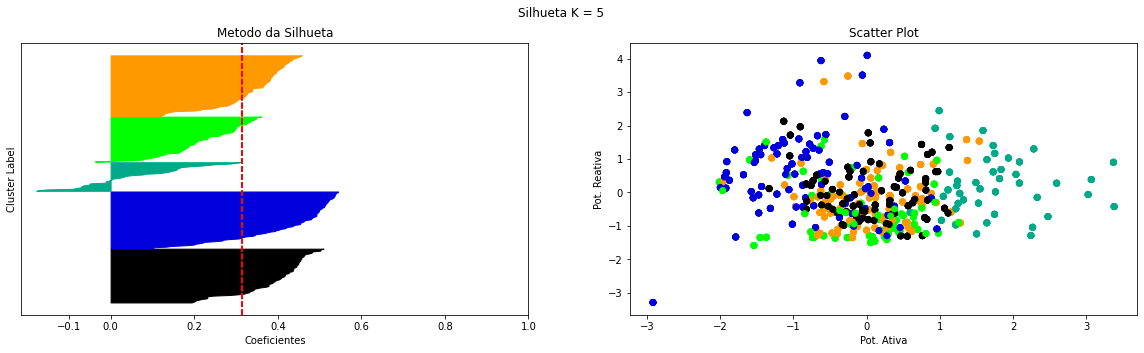

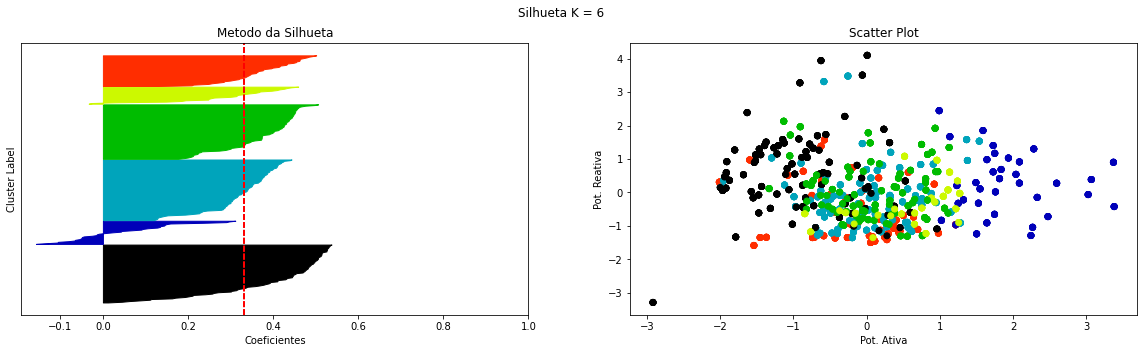

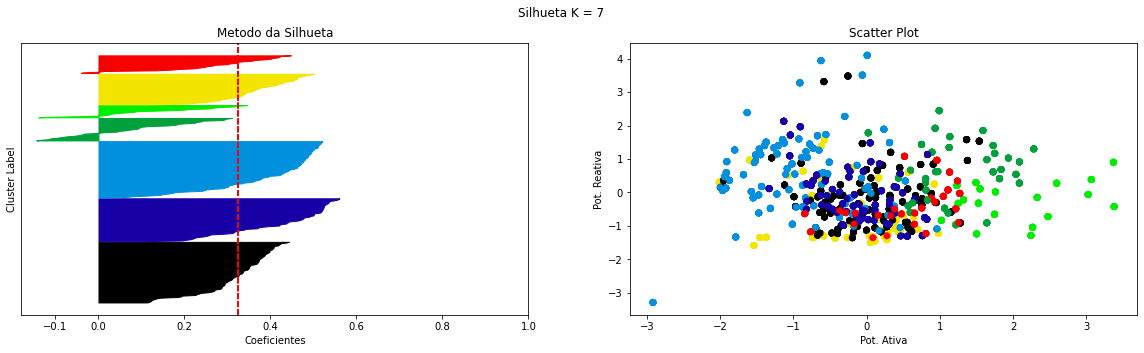

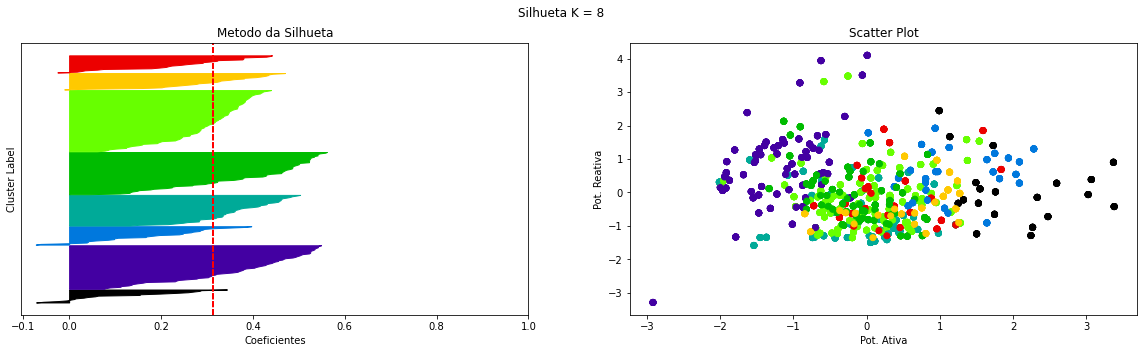

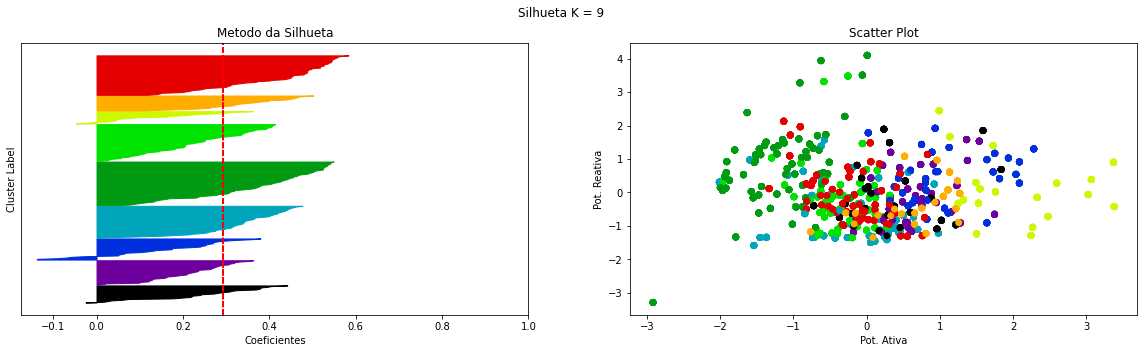

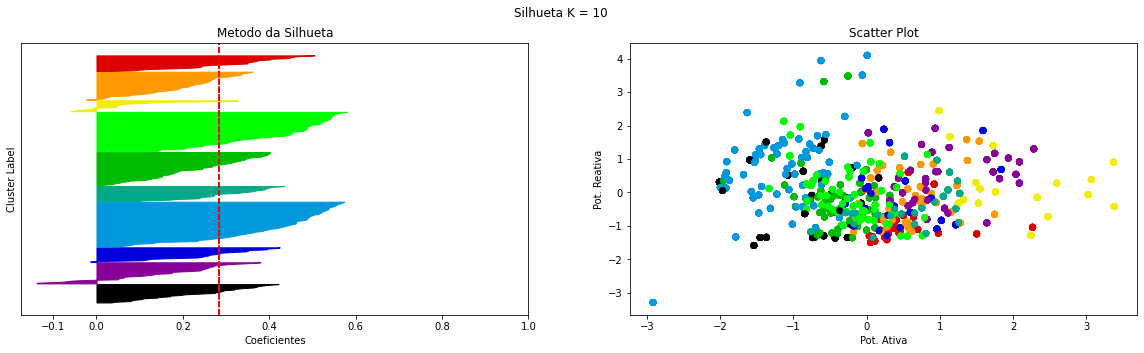

In [58]:
grafico_silhueta(df_s.iloc[:,0], df_s.iloc[:,1], 'Pot. Ativa', 'Pot. Reativa')

> Gráfico Silhueta Pot. Ativa x Energia Cozinha

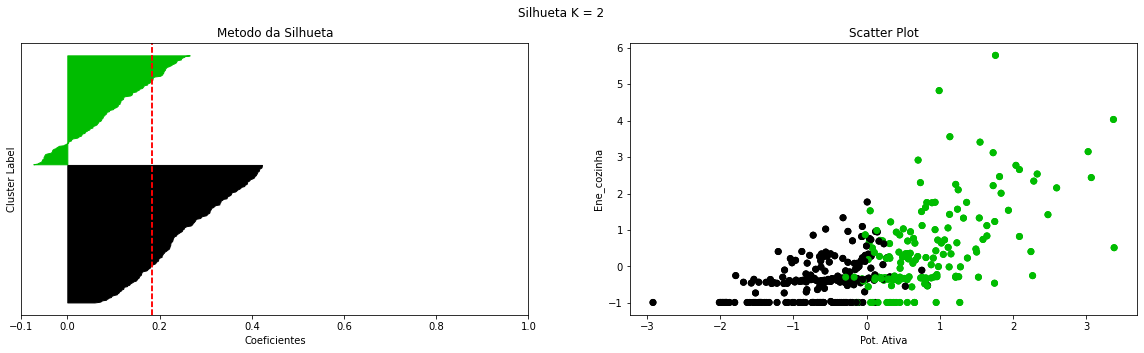

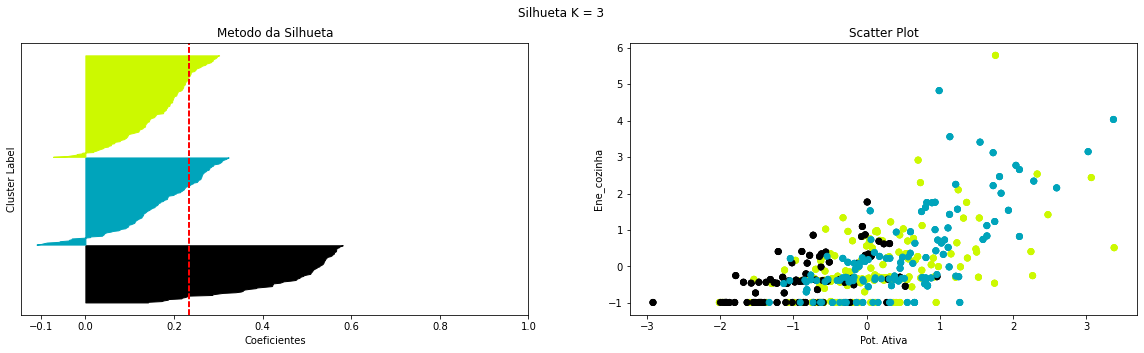

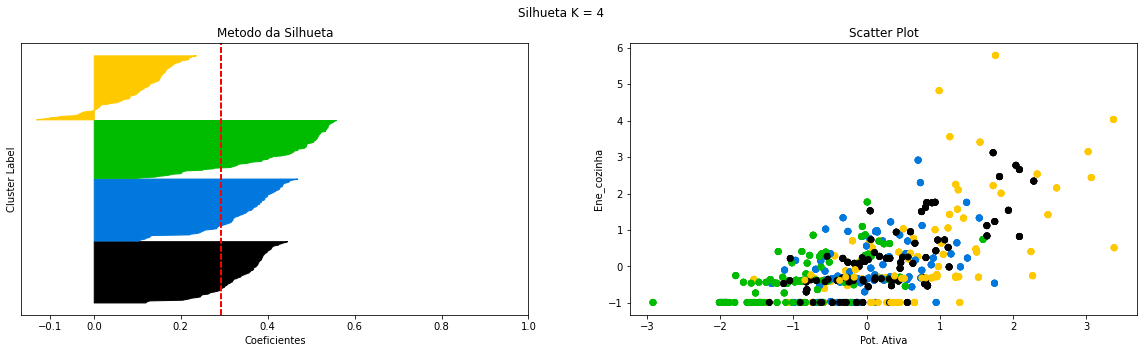

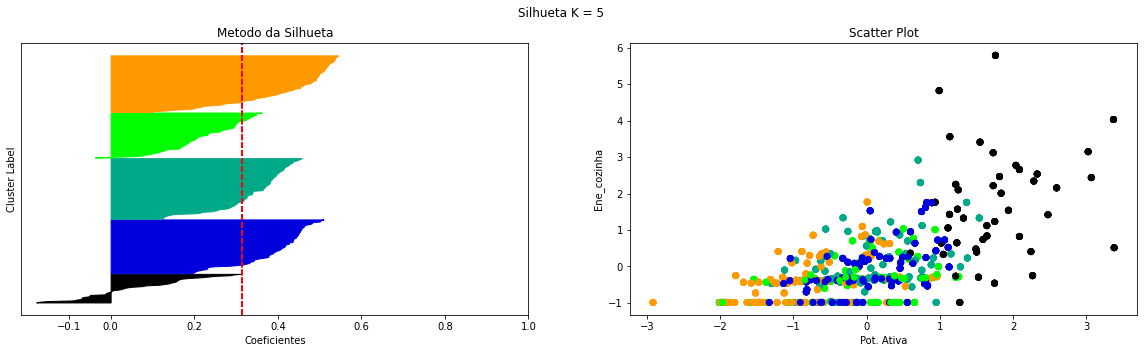

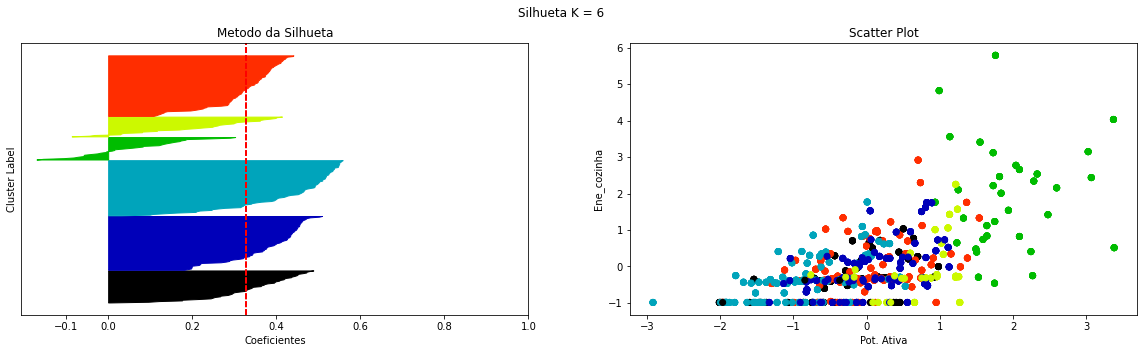

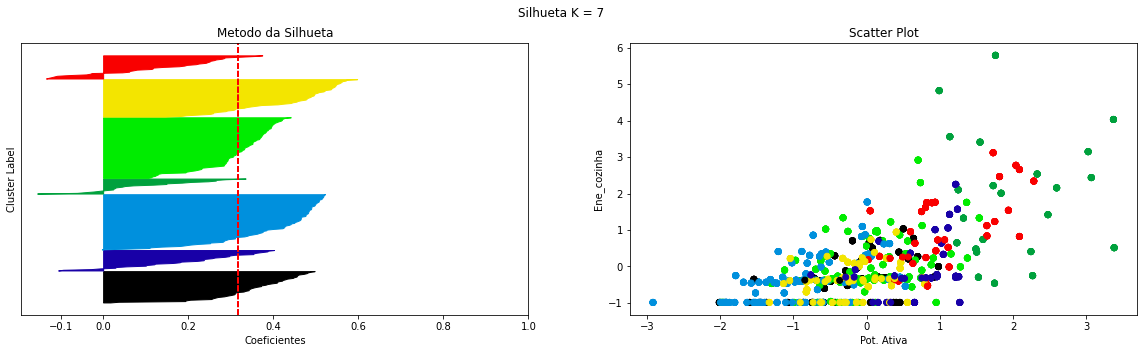

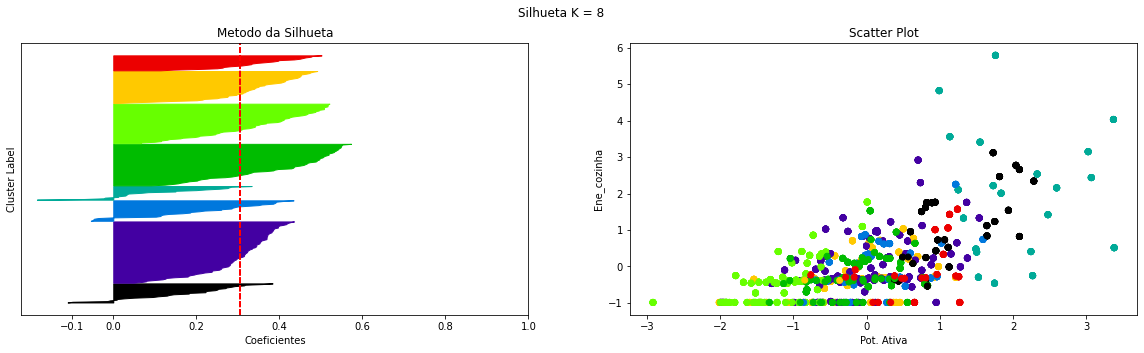

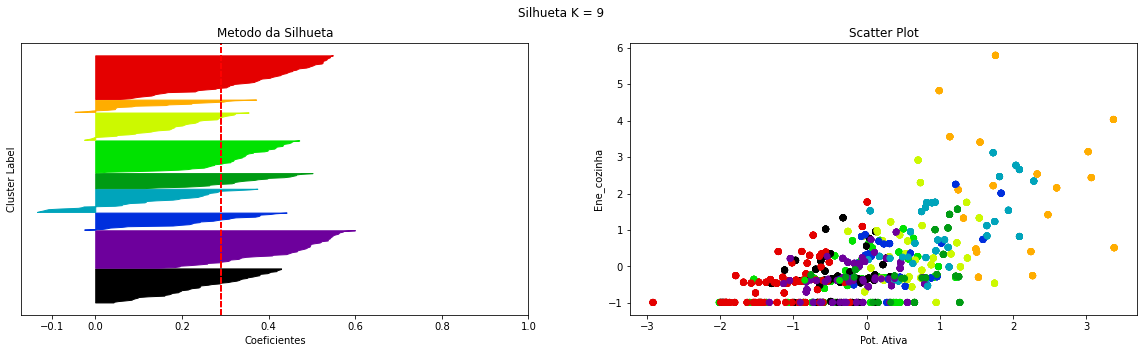

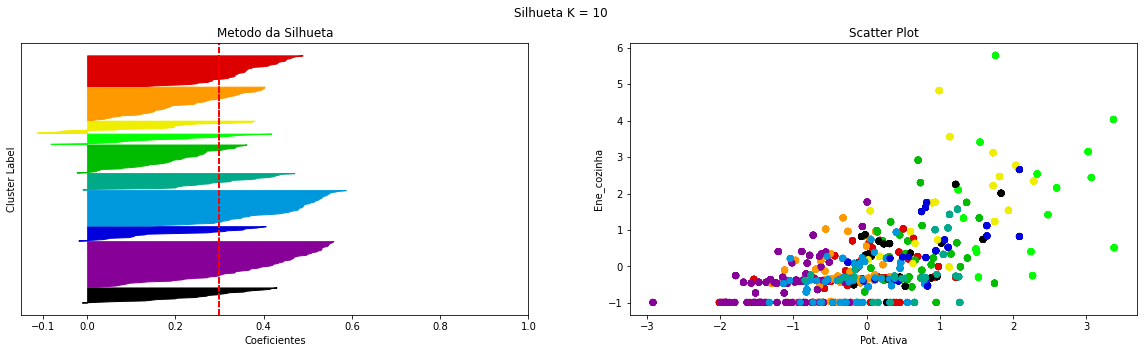

In [59]:
grafico_silhueta(df_s.iloc[:,0], df_s.iloc[:,4], 'Pot. Ativa', 'Ene_cozinha')

> Gráfico Silhueta Pot. Ativa x Energia Lavanderia

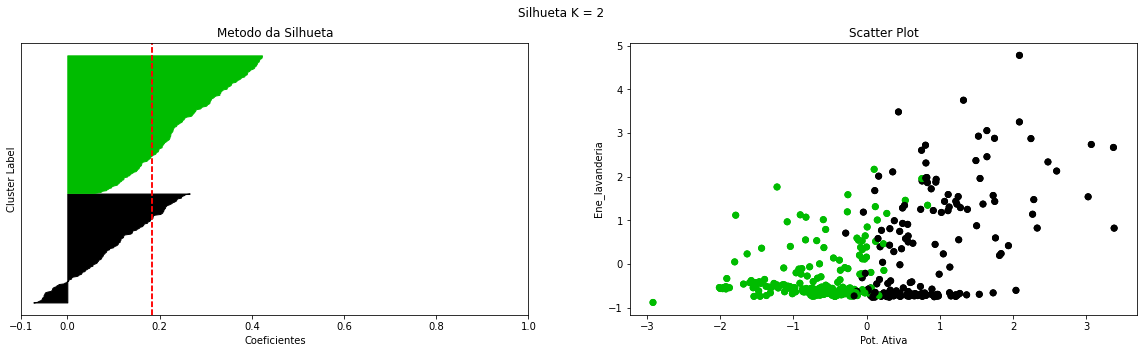

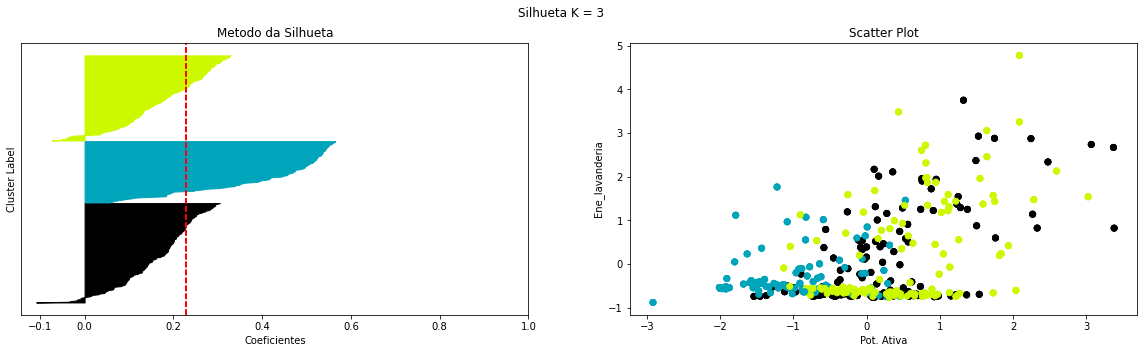

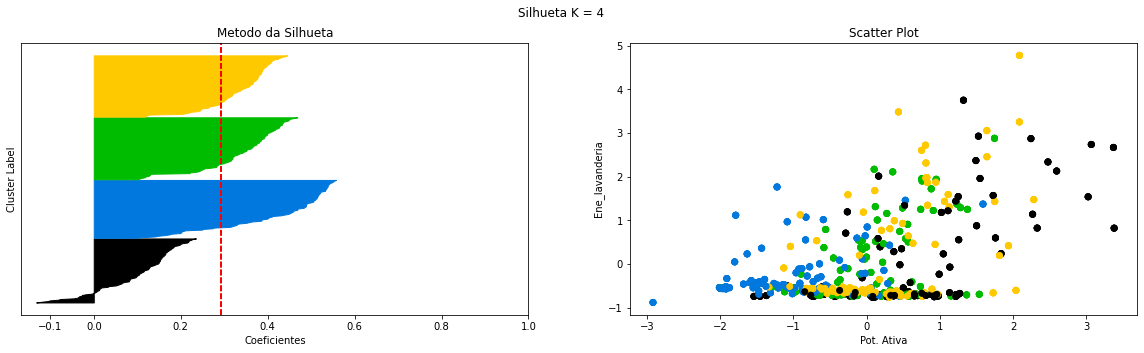

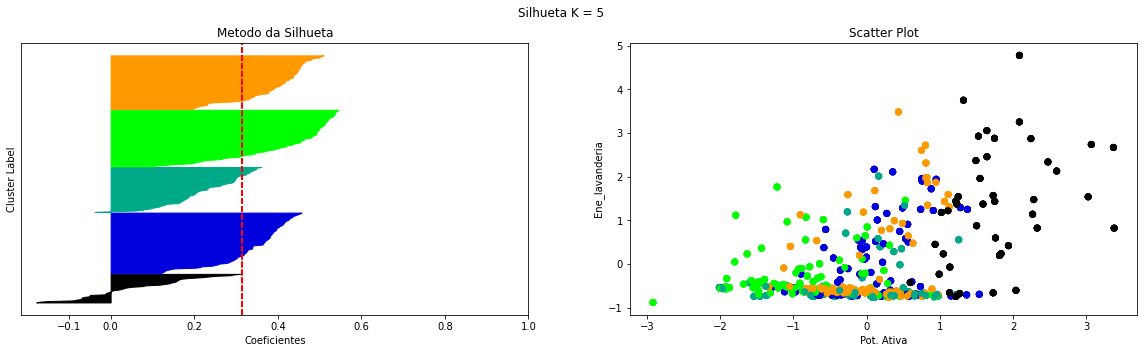

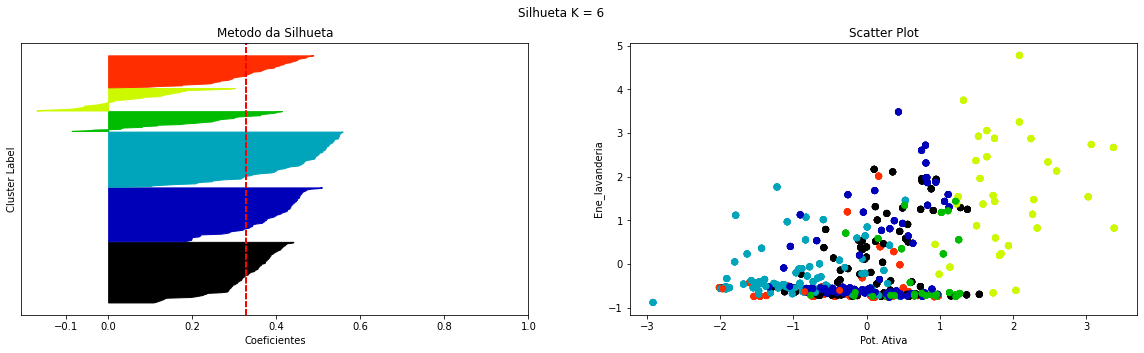

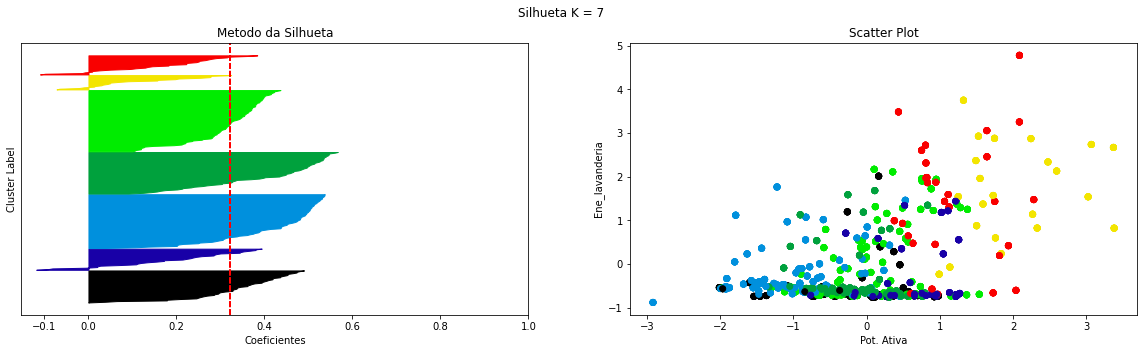

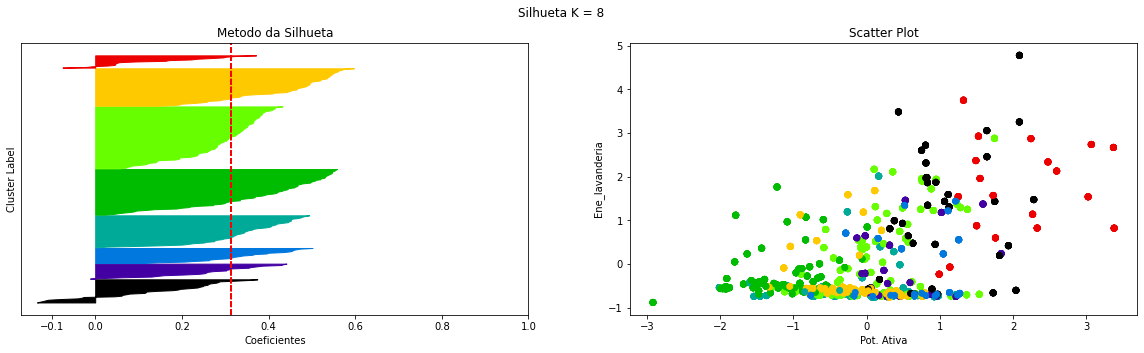

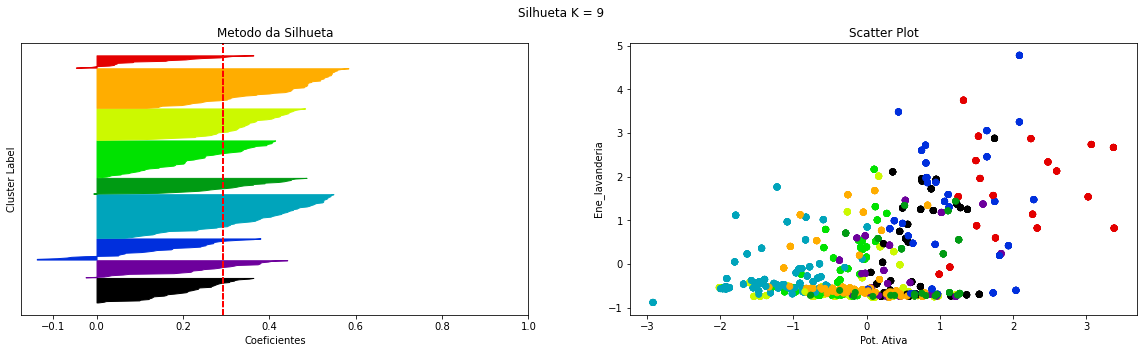

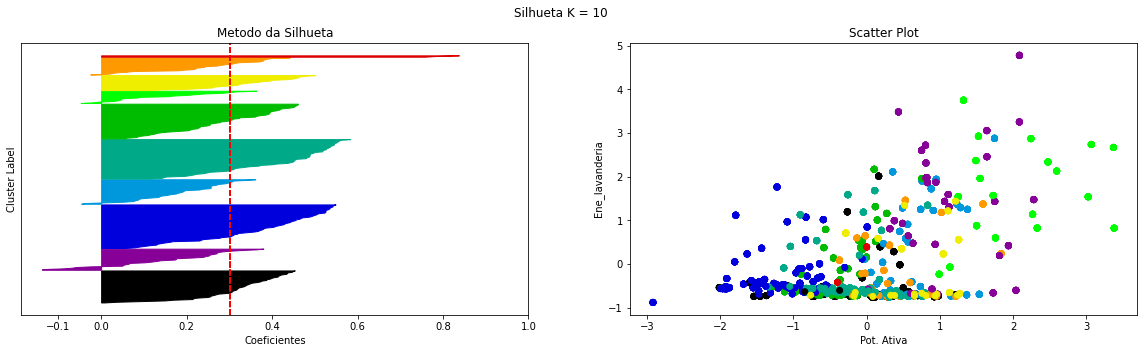

In [60]:
grafico_silhueta(df_s.iloc[:,0], df_s.iloc[:,5], 'Pot. Ativa', 'Ene_lavanderia')

> Gráfico Silhueta Pot. Ativa x Energia Porão

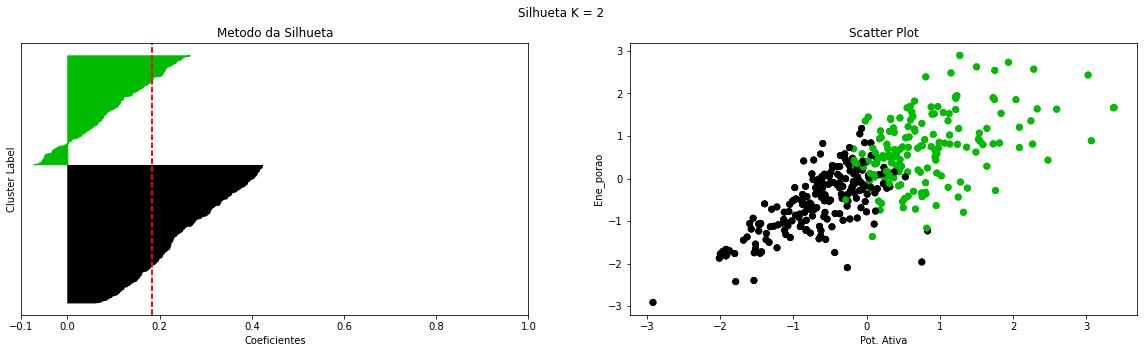

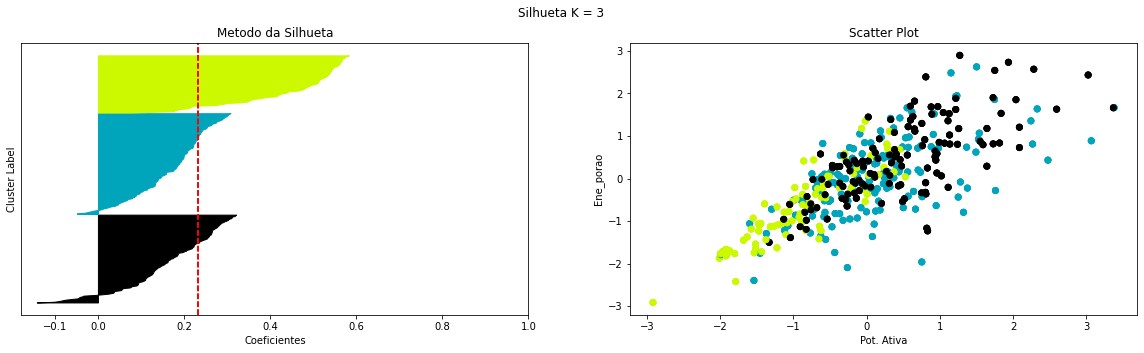

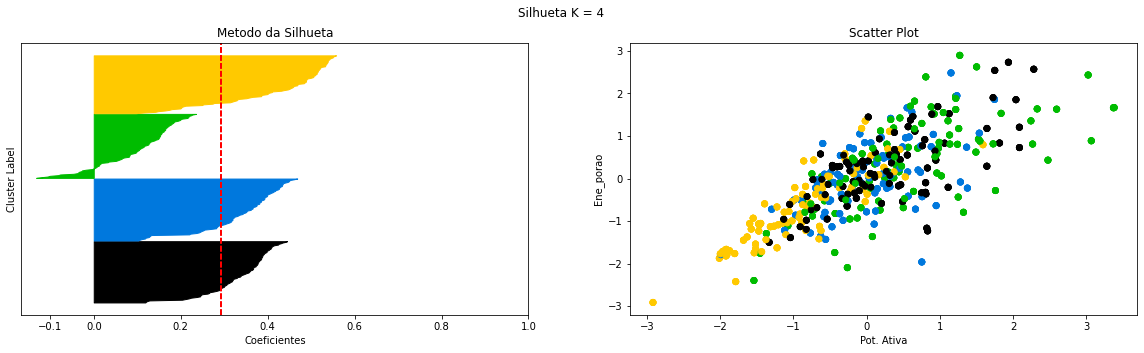

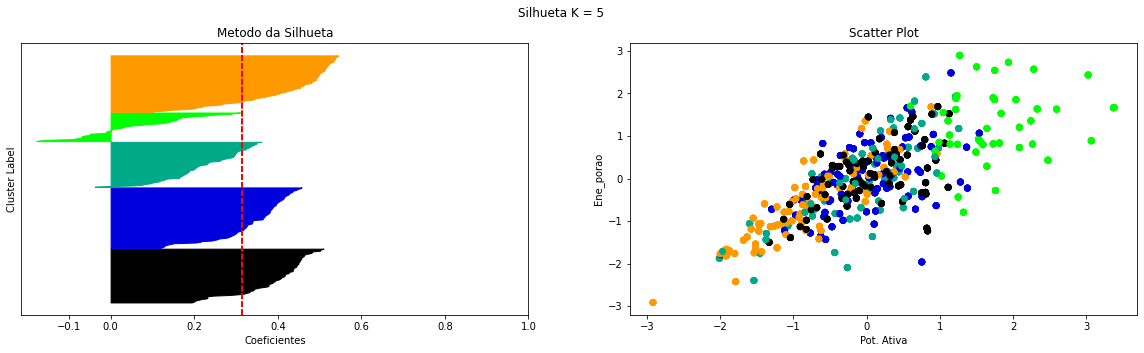

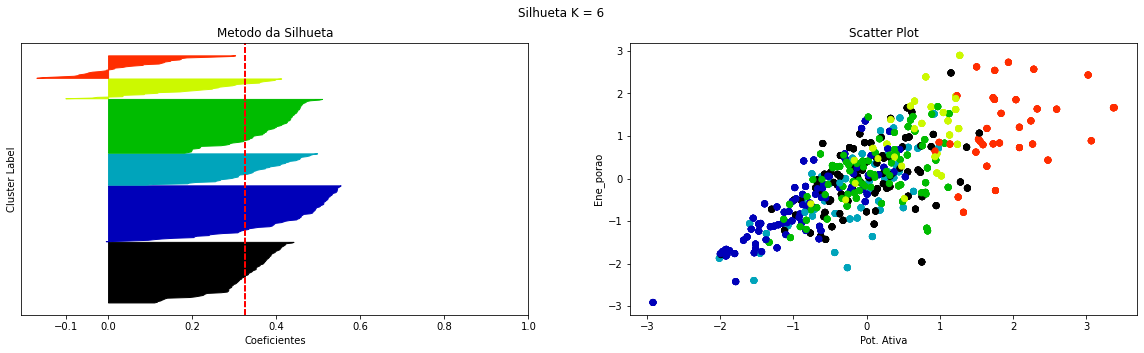

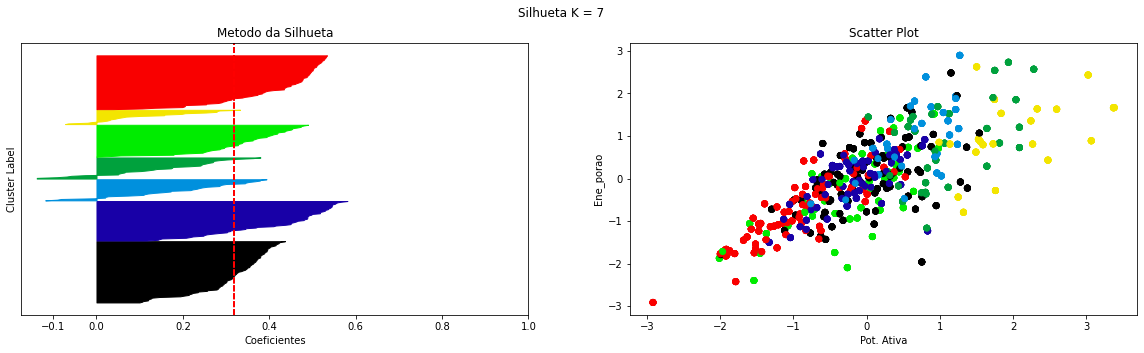

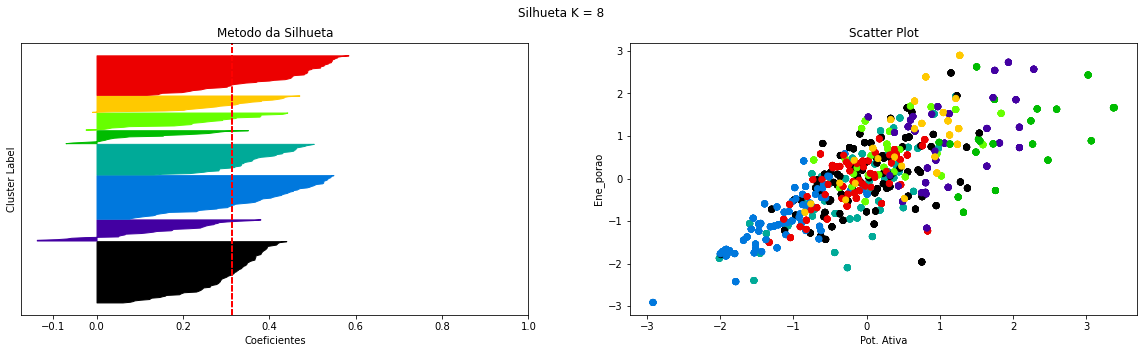

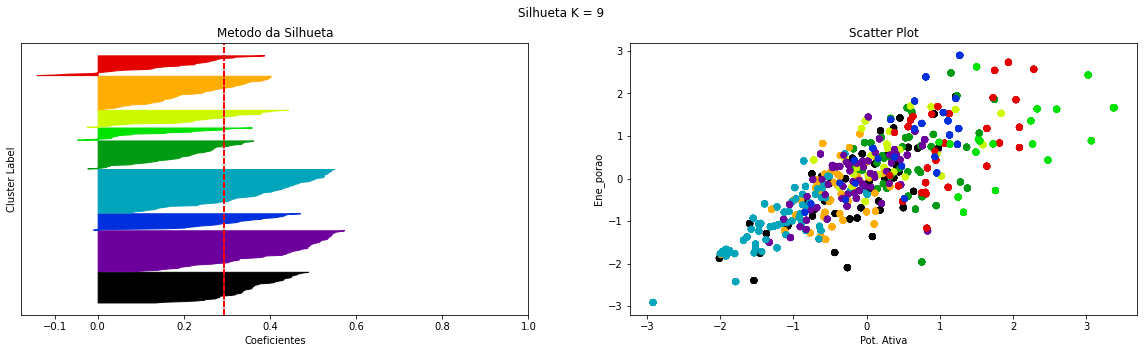

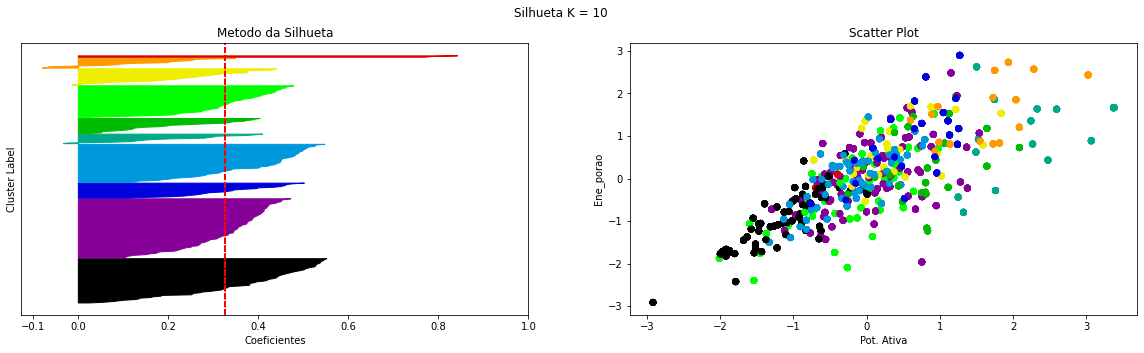

In [61]:
grafico_silhueta(df_s.iloc[:,0], df_s.iloc[:,6], 'Pot. Ativa', 'Ene_porao')

>Para cada cluster o método pega todos os elementos do cluster e verifica o quanto cada elemento faz parte de um centróide e não faz parte dos outros. Ao ordenar dá a visão de quem é mais pertencente ao k específico.<br>
> Procuramos por silhuetas com similaridade de largura e altura de picos. Indicam clusters bem definidos.

> **Redução de dimensionalidade (PCA)**<br><br>
> Tem como objetivo resumir o problema sem perder a informação. Ao se criar uma componente esta carrega as informações dos seus vizinhos mais próximos. Ex.: 3 de 12, cada componente carrega a informação de outras 3. O grande problema do PCA é saber se a redução realizada ainda representa a completude dos dados. Temos alguns métodos para verificar isso, como:

* Gráfico com Variância das componentes -  Indica a variância de acordo com a quantidade de features. Quanto maior a quantidade de features, menor a variância e maior a "explicação". Ex.: Com 1 componente perco muito mais informações "menor explicação" do que com todas as componentes.
* Gráfico com razão de variância das componentes - Faz gráfico tipo curva ROC que mostra a razão da variância (%) por componentes. Alí se escolhe qual a quantidade de componentes que explica, por exemplo, 90% das informações.

In [62]:
pca = PCA()
pca.fit(df_s)
features = range(pca.n_components_)

> Variância das componentes

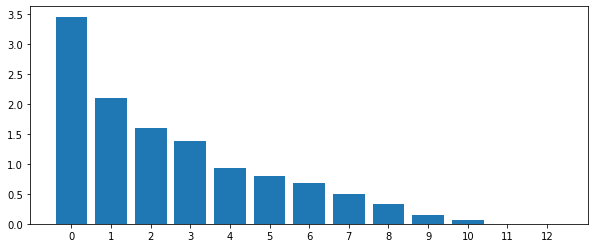

In [63]:
plt.figure(figsize=(10,4))
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.show()

> % Variância das componentes

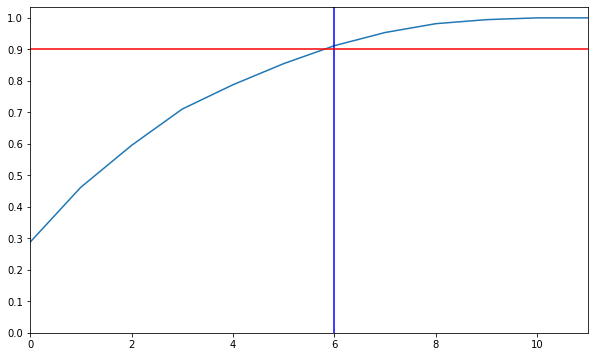

In [64]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,11)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.9, c='r')
plt.show()

> Neste caso vemos que com k~6 conseguimos 90% de explicabilidade. Vamos tentar validar esse valor pelo próprio PCA

In [65]:
# Passando o percentual de 90%
pca = PCA(.9)
pca.fit(df_s)
features = range(pca.n_components_)

In [66]:
pca.n_components_

7